# Mklearn Tutorial on Simulated Dataset

In [9]:
# import standard packages
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import importlib
import sklearn
from sklearn import preprocessing
import scipy
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import mklearn and multiclass
LIB_PATH = 'mklearn/'
sys.path.append(LIB_PATH)
import mklearn
import multiclass
importlib.reload(mklearn)
importlib.reload(multiclass)

<module 'multiclass' from 'mklearn/multiclass.py'>

Number of training examples: 60
Number of test examples: 40


[]

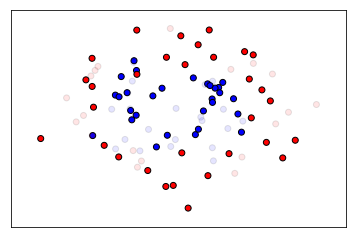

In [15]:
# generate simulated data
X, y = sklearn.datasets.make_circles(noise=0.2, factor=0.5, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
y_train = 2*y_train - 1
y_test = 2*y_test - 1
print('Number of training examples:', X_train.shape[0])
print('Number of test examples:', X_test.shape[0])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.1,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

final objective: 0.99749
final train error: 0.5
final validation error: 0.5


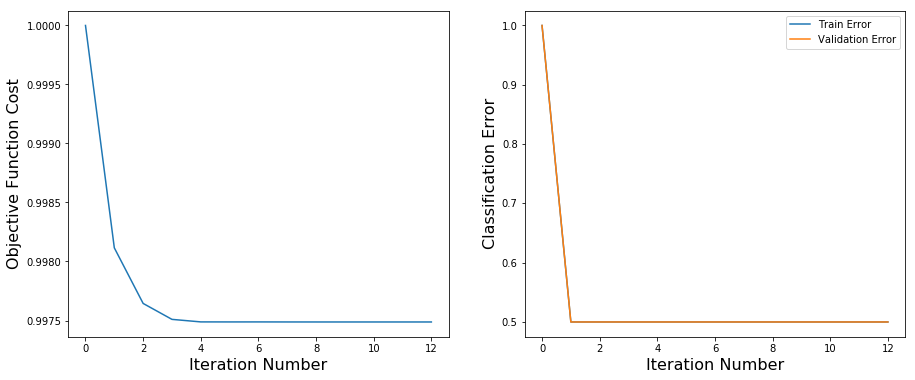

In [19]:
# train binary classification model using myLinearSVC
myLinearSVC_model = mklearn.myLinearSVC(loss='smooth_hinge', tol=1e-6, C=1.0, 
                                        verbose=False, max_iter=1000)
myLinearSVC_model.fit(X_train, y_train)
myLinearSVC_model.display_results(X_train, y_train)

In [22]:
def evaluate(betas):
    Zs = np.c_[xx.ravel(), yy.ravel()]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = plt.subplot()
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()
    
betas = myLinearSVC_model.betas[-1]
evaluate(betas)

UnboundLocalError: local variable 'Z' referenced before assignment